# Unsurpervised Learning Algorithm : 

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler 

sns.set()

In [5]:
outdir = './data/processed_data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [6]:
diabetes_df = pd.read_csv('data/diabetes_012_health_indicators.csv')

In [7]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
diabetes_df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
diabetes_df.duplicated().sum()

23899

In [11]:
#Remove duplicated rows 
diabetes_df.drop_duplicates(inplace = True)

In [12]:
diabetes_df['Diabetes_012'].value_counts()

0.0    190055
2.0     35097
1.0      4629
Name: Diabetes_012, dtype: int64

In [13]:
# drop Diabetes_012 column from dataset to get input matrix X
X = diabetes_df.drop('Diabetes_012', axis=1)
# Extract Diabetes_012 column to generate output vector y
y = diabetes_df['Diabetes_012']

In [14]:
output_filename = os.path.join(outdir,f"cleanded_diabetes_data.csv" )
diabetes_df.to_csv(output_filename,index=False)

<Figure size 640x480 with 0 Axes>

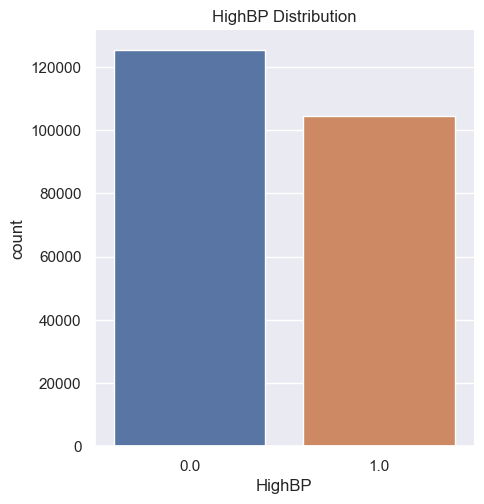

<Figure size 640x480 with 0 Axes>

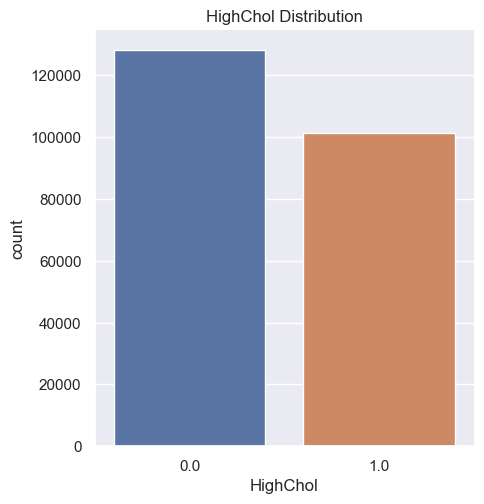

<Figure size 640x480 with 0 Axes>

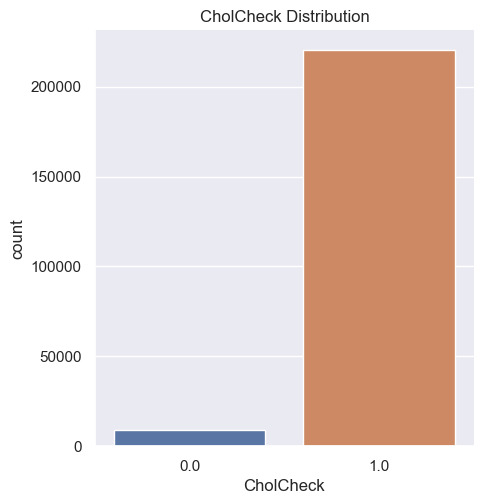

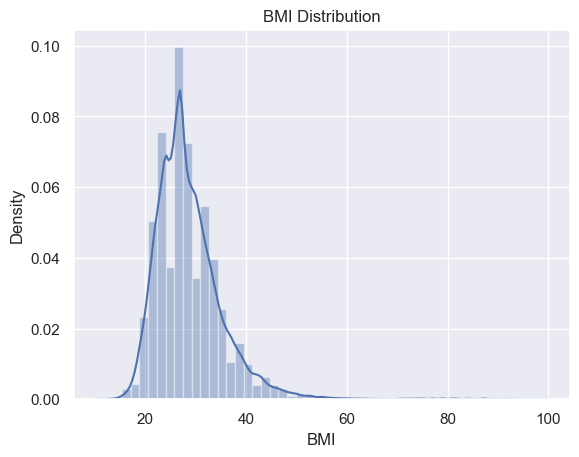

<Figure size 640x480 with 0 Axes>

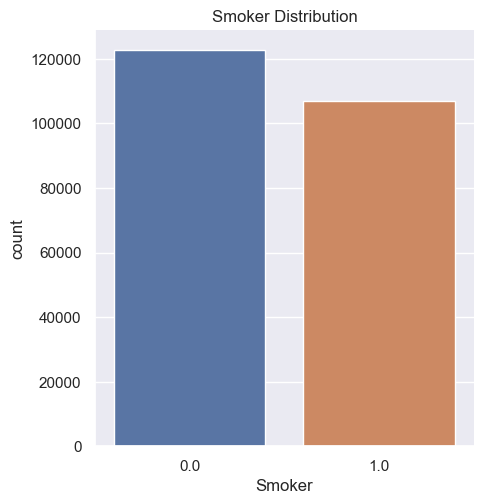

<Figure size 640x480 with 0 Axes>

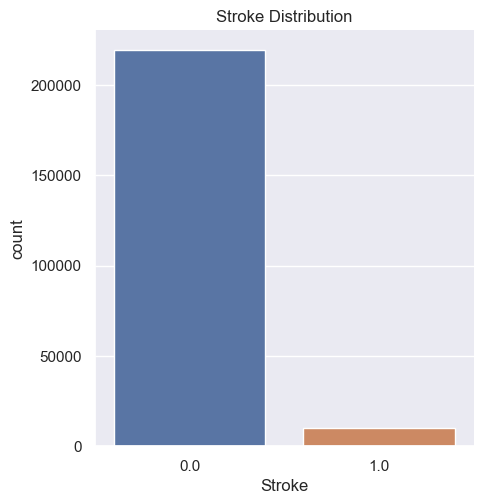

<Figure size 640x480 with 0 Axes>

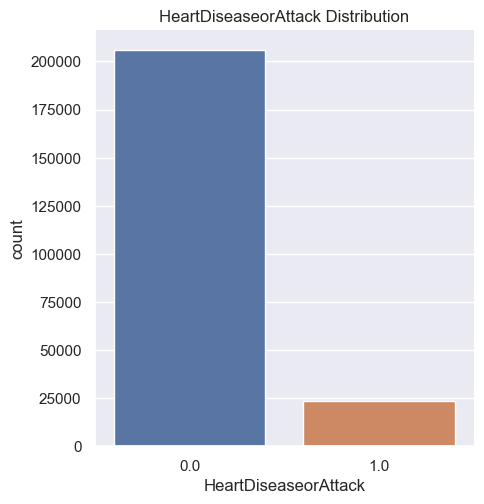

<Figure size 640x480 with 0 Axes>

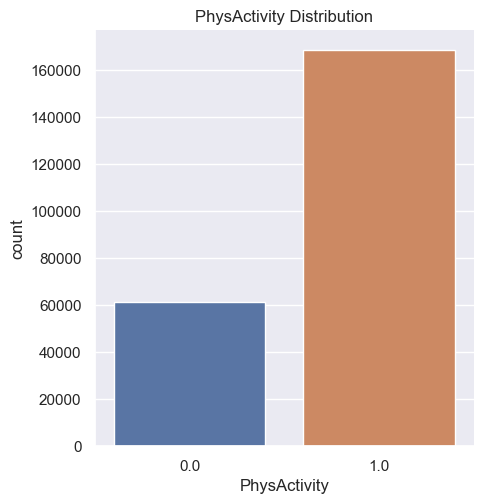

<Figure size 640x480 with 0 Axes>

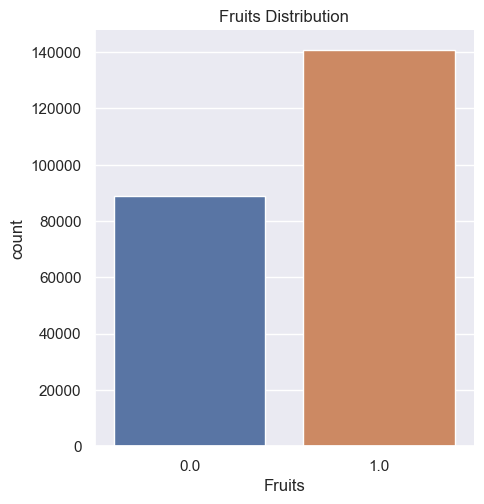

<Figure size 640x480 with 0 Axes>

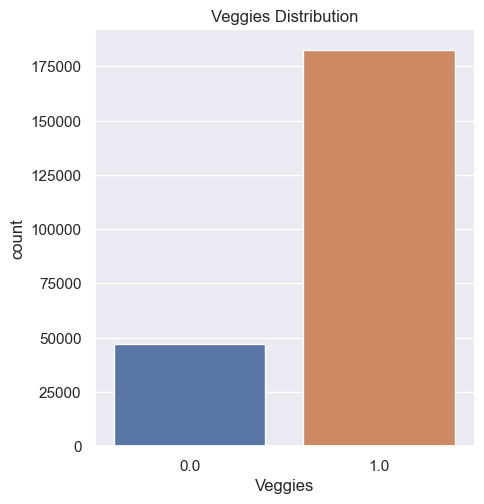

<Figure size 640x480 with 0 Axes>

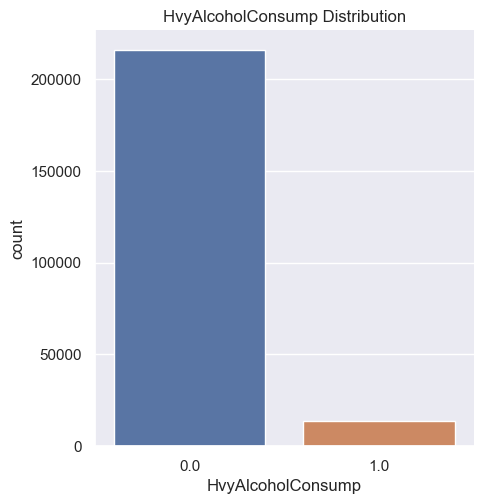

<Figure size 640x480 with 0 Axes>

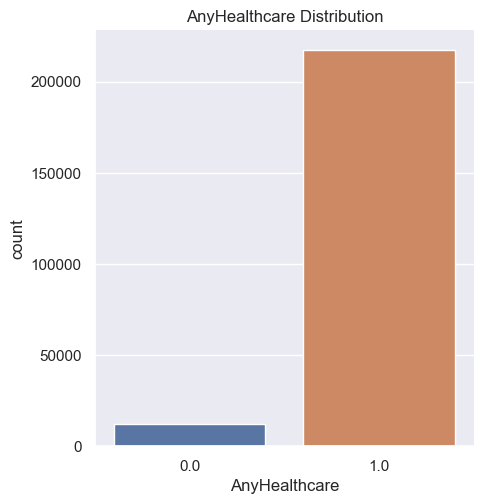

<Figure size 640x480 with 0 Axes>

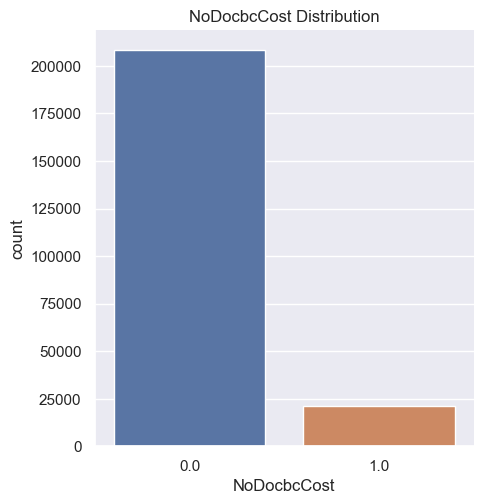

<Figure size 640x480 with 0 Axes>

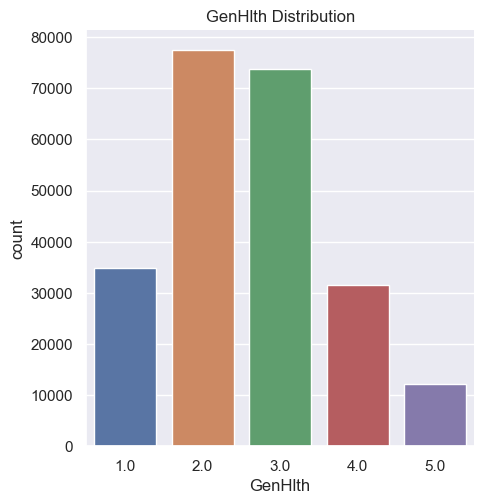

<Figure size 640x480 with 0 Axes>

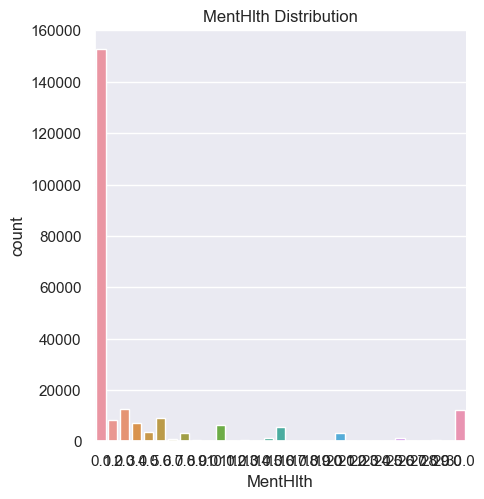

<Figure size 640x480 with 0 Axes>

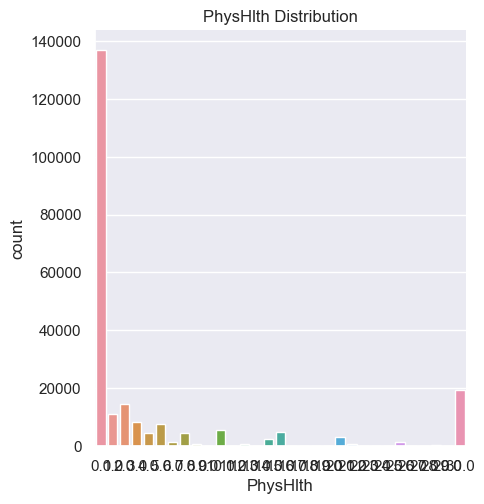

<Figure size 640x480 with 0 Axes>

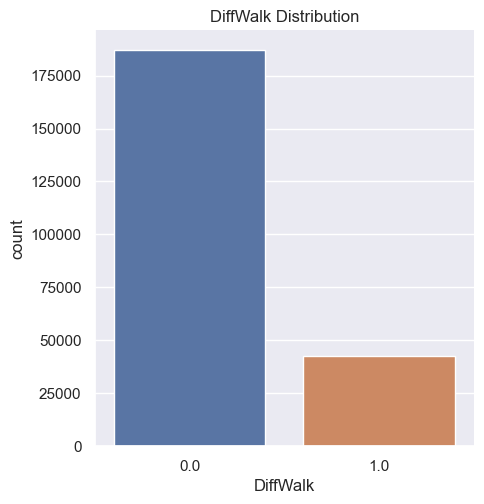

<Figure size 640x480 with 0 Axes>

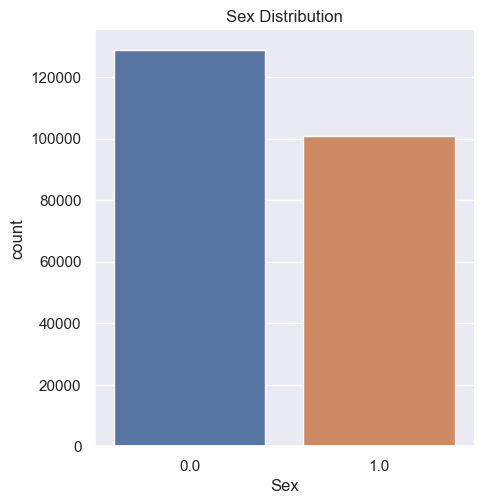

<Figure size 640x480 with 0 Axes>

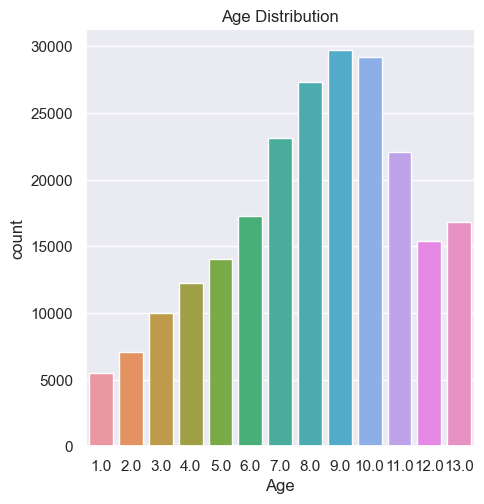

<Figure size 640x480 with 0 Axes>

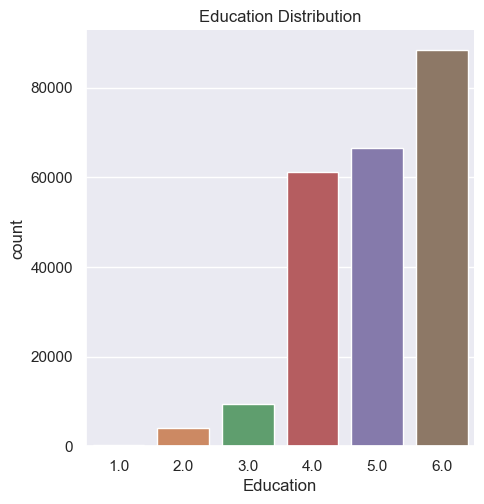

<Figure size 640x480 with 0 Axes>

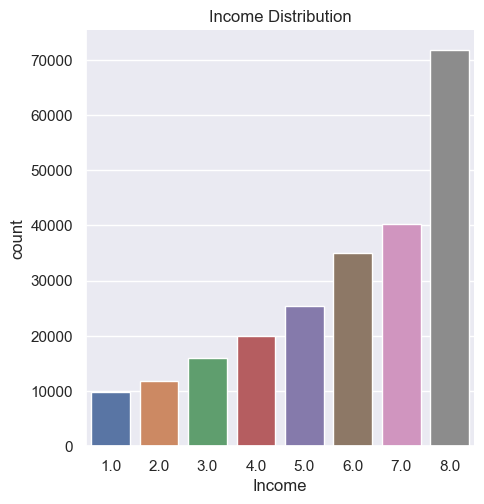

In [174]:
# Visualize the distribution of each variable.
#plt.figure(figsize=(20,20))
for i, j in enumerate(X.describe().columns):
    #plt.subplot(11,2, i+1)
    plt.figure()
    if (j == 'BMI'):
        sns.distplot(x=X[j])
    else:
        sns.catplot(x=j, kind="count", data=X)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    #plt.tight_layout()
    plt.show()

In [175]:
X.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
HighBP,229781.000000,0.454441,0.497921,0.000000,0.000000,0.000000,1.000000,1.000000
HighChol,229781.000000,0.441760,0.496598,0.000000,0.000000,0.000000,1.000000,1.000000
CholCheck,229781.000000,0.959535,0.197047,0.000000,1.000000,1.000000,1.000000,1.000000
BMI,229781.000000,28.685670,6.786360,12.000000,24.000000,27.000000,32.000000,98.000000
Smoker,229781.000000,0.465661,0.498821,0.000000,0.000000,0.000000,1.000000,1.000000
Stroke,229781.000000,0.044756,0.206767,0.000000,0.000000,0.000000,0.000000,1.000000
HeartDiseaseorAttack,229781.000000,0.103216,0.304241,0.000000,0.000000,0.000000,0.000000,1.000000
PhysActivity,229781.000000,0.733355,0.442206,0.000000,0.000000,1.000000,1.000000,1.000000
Fruits,229781.000000,0.612966,0.487073,0.000000,0.000000,1.000000,1.000000,1.000000
Veggies,229781.000000,0.794813,0.403839,0.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
for column in diabetes_df.columns:
    print(f"{column}:")
    print(f"{diabetes_df[column].unique()}")

Diabetes_012:
[0. 2. 1.]
HighBP:
[1. 0.]
HighChol:
[1. 0.]
CholCheck:
[1. 0.]
BMI:
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker:
[1. 0.]
Stroke:
[0. 1.]
HeartDiseaseorAttack:
[0. 1.]
PhysActivity:
[0. 1.]
Fruits:
[0. 1.]
Veggies:
[1. 0.]
HvyAlcoholConsump:
[0. 1.]
AnyHealthcare:
[1. 0.]
NoDocbcCost:
[0. 1.]
GenHlth:
[5. 3. 2. 4. 1.]
MentHlth:
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth:
[15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk:
[1. 0.]
Sex:
[0. 1.]
Age:
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3

Diabetes_012
HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income


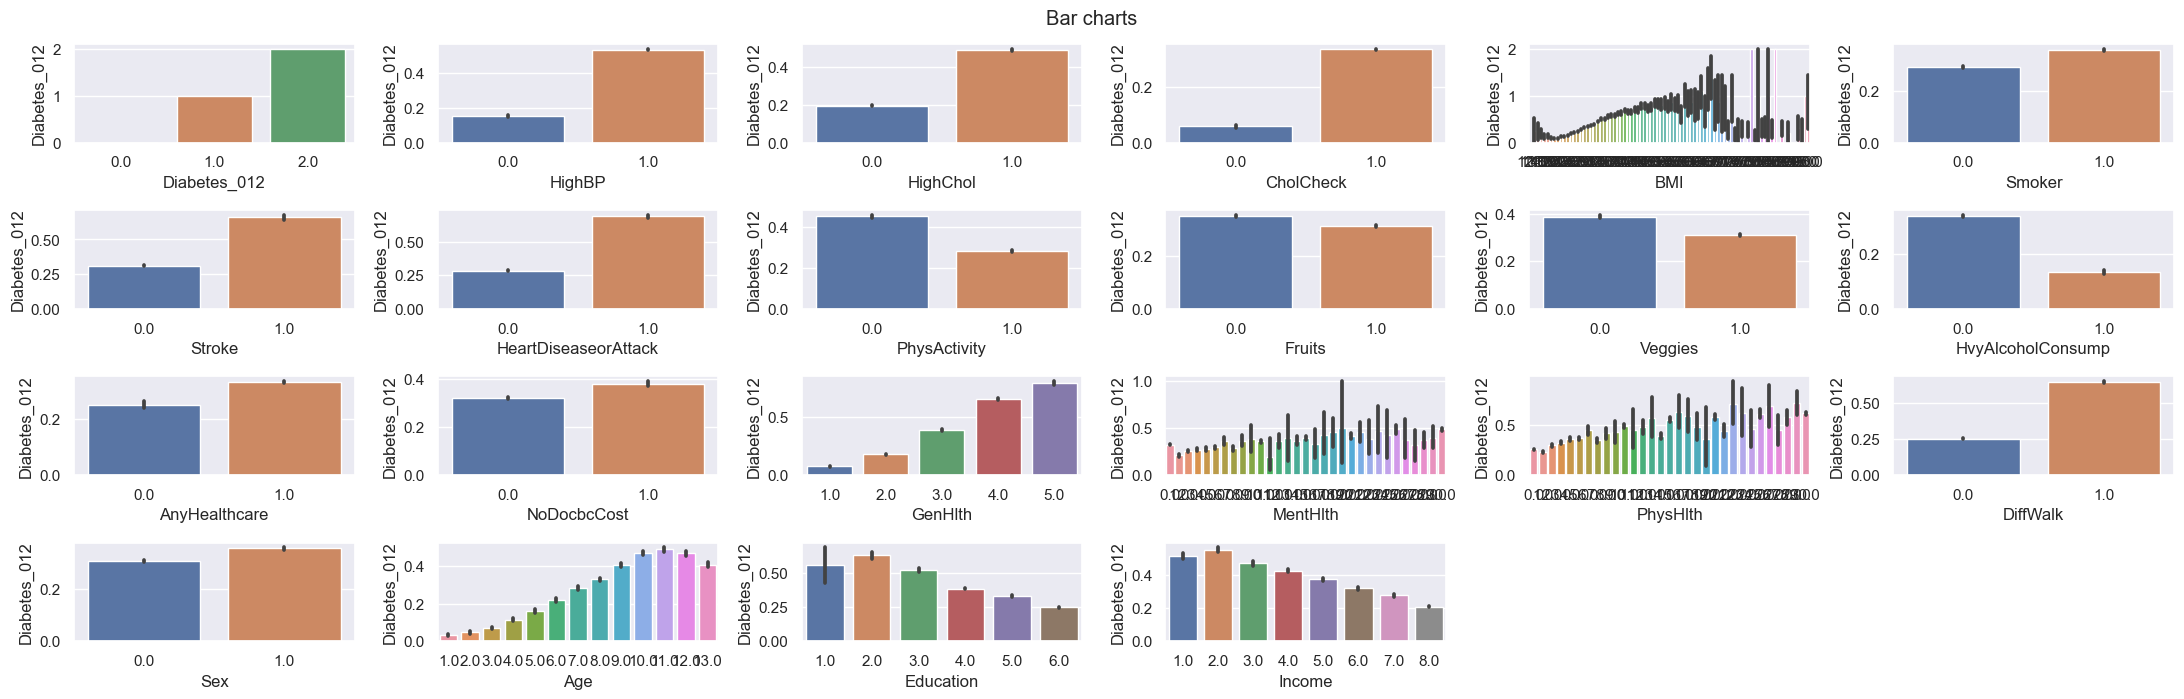

In [177]:
figure = plt.figure(figsize = (22,8))
count =0
for column in diabetes_df.columns:
    feature_name = column
    print(column)
    plt.subplot(5, 6, count+1)
    #if diabetes_df[feature_name].dtype == 'int': 
     #   sns.distplot(diabetes_df[feature_name], fit=stats.norm, color = 'red')        
    #else: 
    #sns.distplot(diabetes_df[feature_name], fit=stats.norm)  
    sns.barplot( x=diabetes_df[feature_name], y=diabetes_df['Diabetes_012'])
    count += 1
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Bar charts', y=1.02)
plt.show()

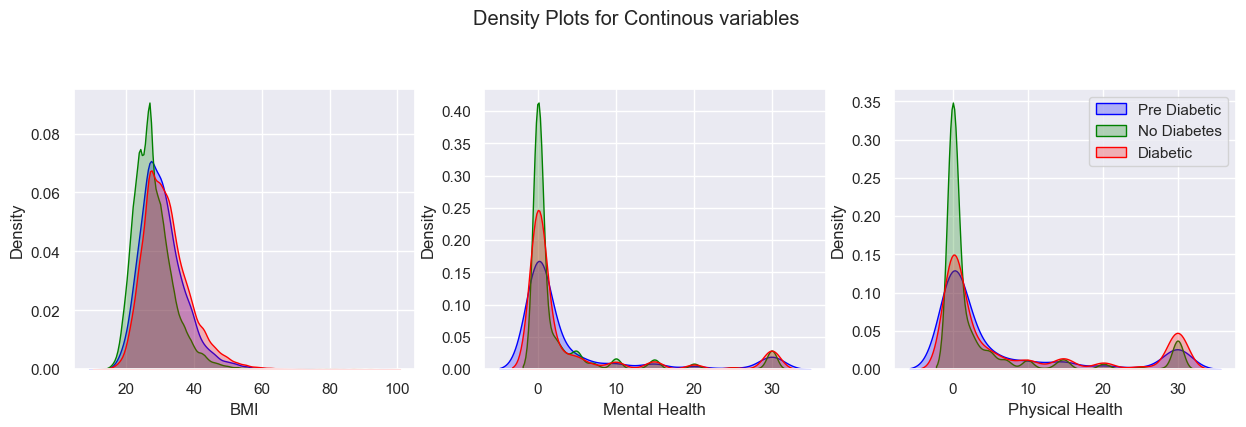

In [179]:
fig3 = plt.figure(figsize = (15,8))

ax1 = fig3.add_subplot(2,3,1)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==1]["BMI"], shade=True, color="blue", label="Pre Diabetic", ax=ax1)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==0]["BMI"], shade=True, color="green", label="No Diabetes", ax=ax1)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==2]["BMI"], shade=True, color="red", label="Diabetic", ax=ax1)
ax1.set_xlabel("BMI")
ax1.set_ylabel("Density")

ax2 = fig3.add_subplot(2,3,2)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==1]["MentHlth"], shade=True, color="blue", label="Pre Diabetic", ax=ax2)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==0]["MentHlth"], shade=True, color="green", label="No Diabetes", ax=ax2)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==2]["MentHlth"], shade=True, color="red", label="Diabetic", ax=ax2)
ax2.set_xlabel("Mental Health")
ax2.set_ylabel("Density")

ax3 = fig3.add_subplot(2,3,3)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==1]["PhysHlth"], shade=True, color="blue", label="Pre Diabetic", ax=ax3)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==0]["PhysHlth"], shade=True, color="green", label="No Diabetes", ax=ax3)
sns.kdeplot(diabetes_df[diabetes_df["Diabetes_012"]==2]["PhysHlth"], shade=True, color="red", label="Diabetic", ax=ax3)
ax3.set_xlabel("Physical Health")
ax3.set_ylabel("Density")

fig3.suptitle("Density Plots for Continous variables");
plt.legend()
plt.show()

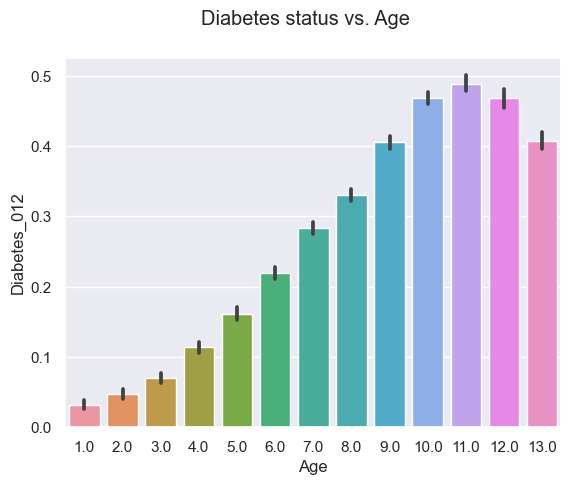

In [180]:
fig4, ax = plt.subplots()

sns.barplot( x=diabetes_df['Age'], y=diabetes_df['Diabetes_012'])

#plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Age")



fig4.suptitle("Diabetes status vs. Age");

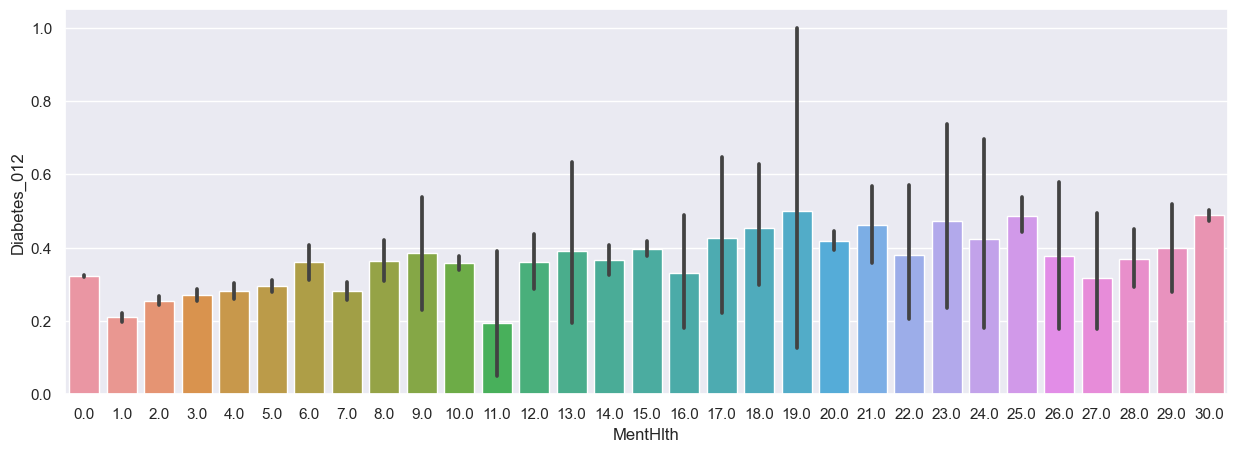

In [118]:
fig5 = plt.figure(figsize = (15,5))

sns.barplot( x=diabetes_df['MentHlth'], y=diabetes_df['Diabetes_012'])

#plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Mental Health")



fig5.suptitle("Diabetes status vs. Mental Health");

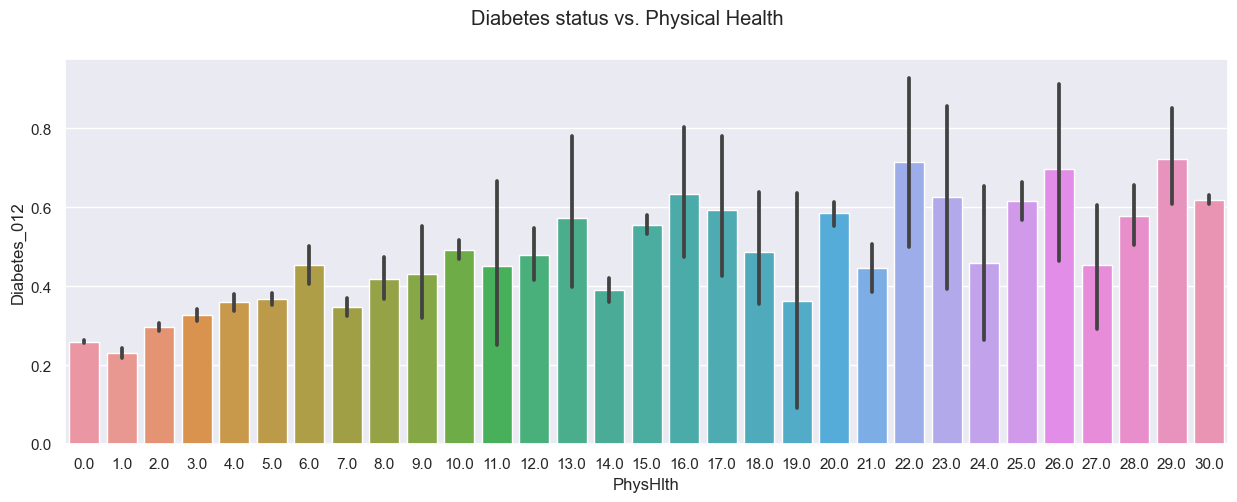

In [181]:
fig5 = plt.figure(figsize = (15,5))

sns.barplot( x=diabetes_df['PhysHlth'], y=diabetes_df['Diabetes_012'])

#plt.close(2) # catplot creates an extra figure we don't need

ax.set_xlabel("Physical Health")



fig5.suptitle("Diabetes status vs. Physical Health");

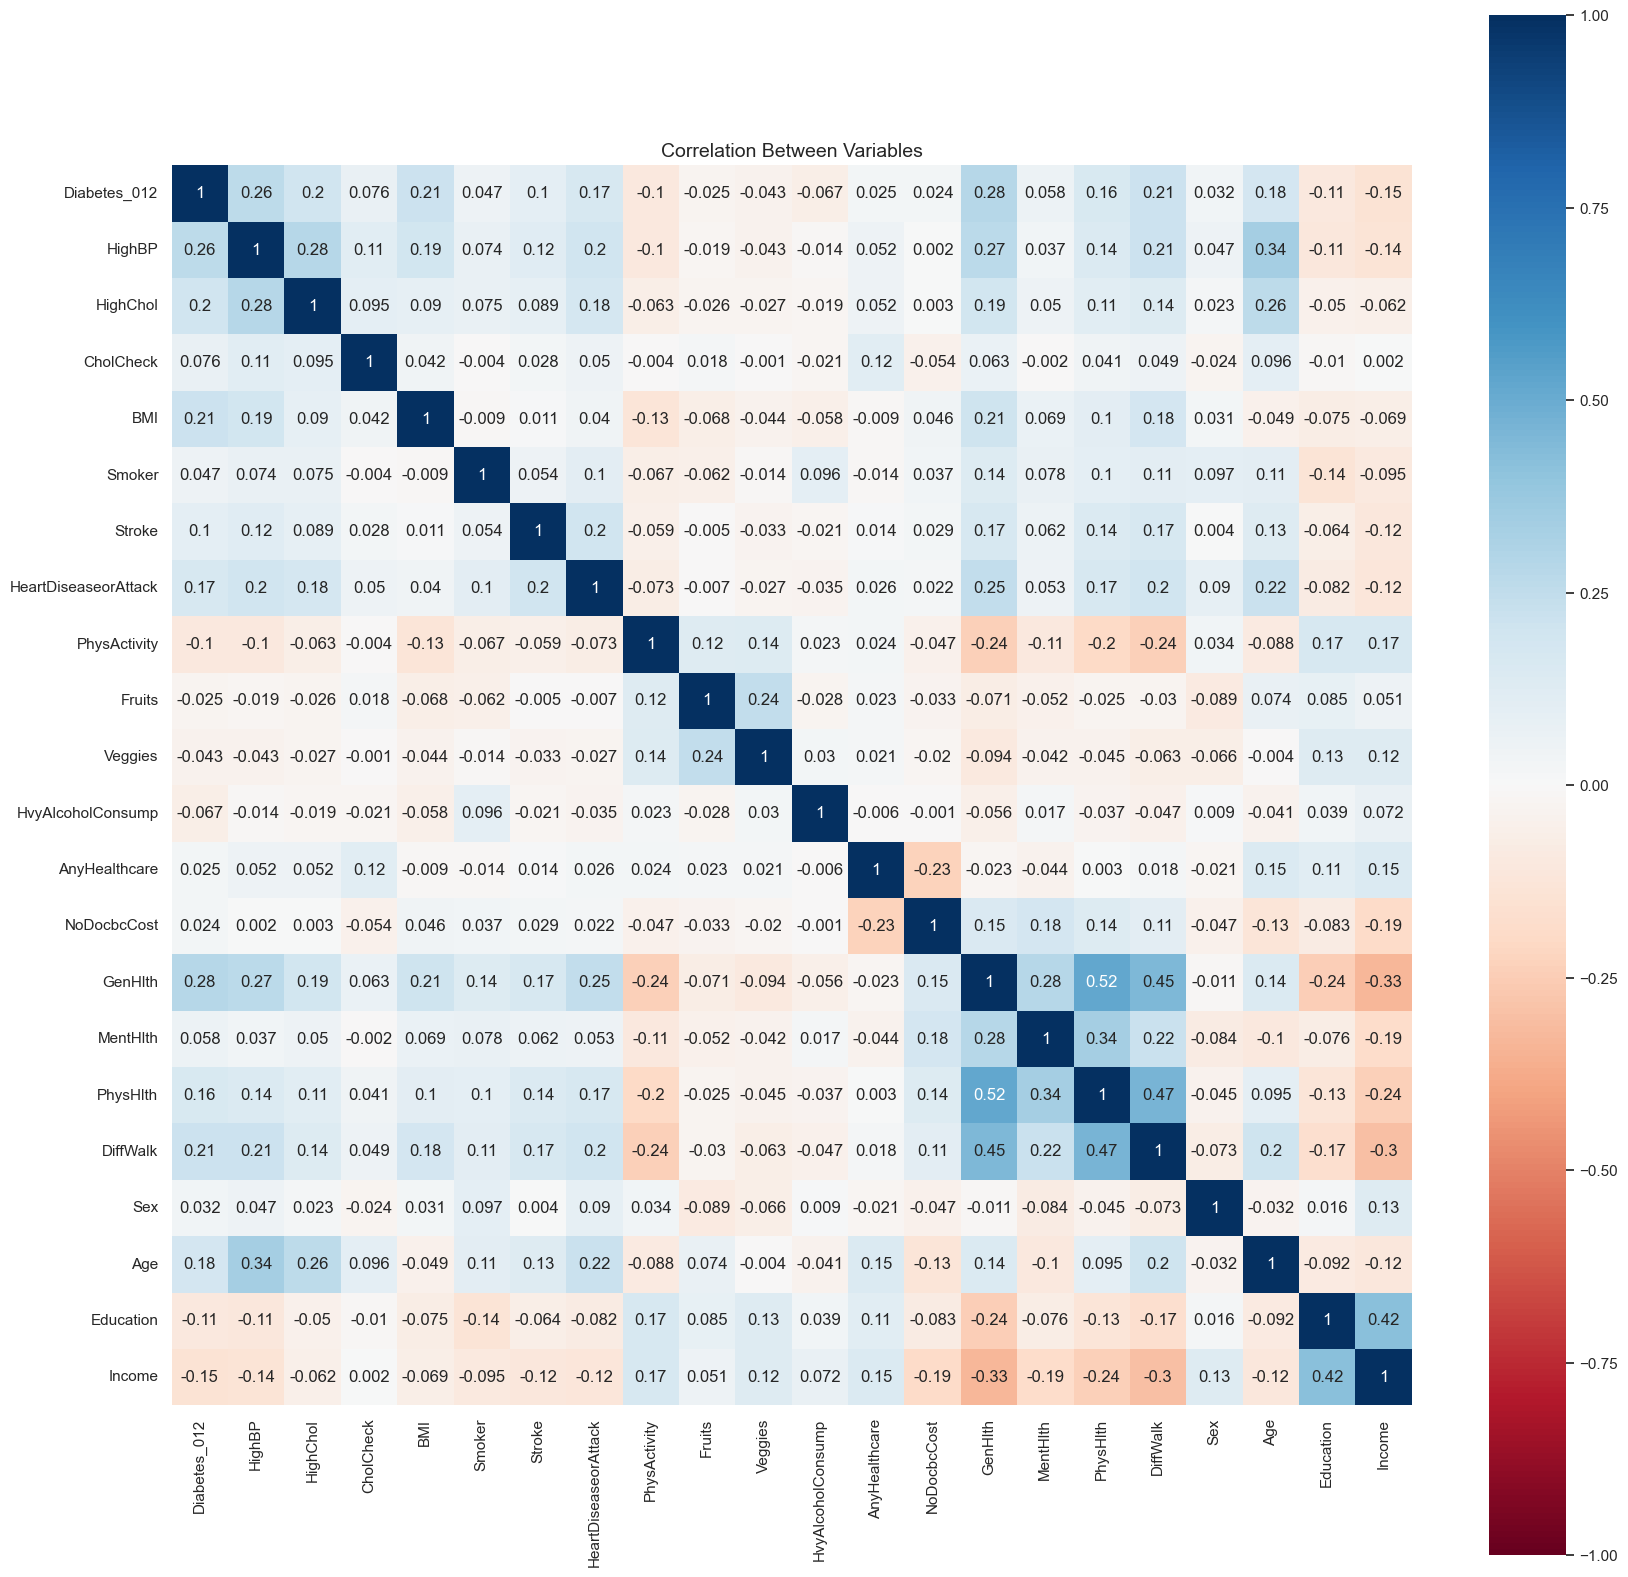

In [193]:
correlation_metrics=diabetes_df.corr().round(3)
fig = plt.figure(figsize=(20,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

In [183]:
#list for cols to scale
#cols_to_scale = ['BMI','GenHlth','MentHlth','Education','Age','Income']

#create and fit scaler
#scaler = StandardScaler()
#scaler.fit(diabetes_df[cols_to_scale])

#scale selected data
#diabetes_df[cols_to_scale] = scaler.transform(diabetes_df[cols_to_scale])

In [184]:
#correlation_metrics=diabetes_df.corr().round(3)
#fig = plt.figure(figsize=(20,20))
#sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
#plt.title('Correlation Between Variables', size=14)

#plt.show()

In [185]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [186]:
# Visualize the distribution of each variable.
#plt.figure(figsize=(20,20))
#for i, j in enumerate(diabetes_df.describe().columns):
    #plt.subplot(11,2, i+1)
 #   plt.figure()
 #   if (j == 'BMI'):
 #       sns.distplot(x=diabetes_df[j])
 #   else:
 #       sns.catplot(x=j, kind="count", data=diabetes_df)
 #   plt.xlabel(j)
 #   plt.title('{} Distribution'.format(j))
 #   # plt.subplots_adjust(wspace=.2, hspace=.5)
 #   #plt.tight_layout()
 #   plt.show()

In [187]:
output_filename = os.path.join(outdir,f"cleanded_diabetes_data.csv" )
diabetes_df.to_csv(output_filename,index=False)

<Axes: xlabel='Income', ylabel='BMI'>

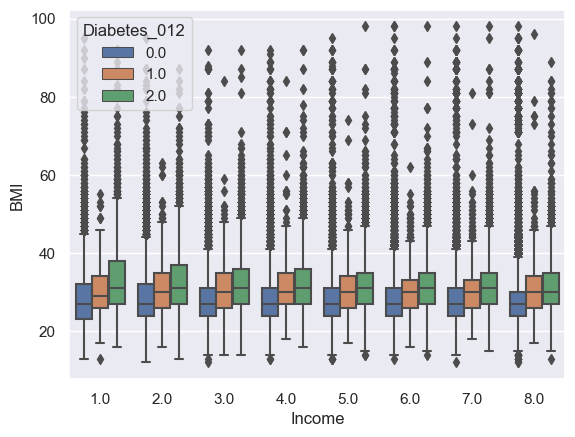

In [209]:
sns.boxplot(diabetes_df, x='Income', y='BMI',hue='Diabetes_012')

<Axes: xlabel='Diabetes_012', ylabel='BMI'>

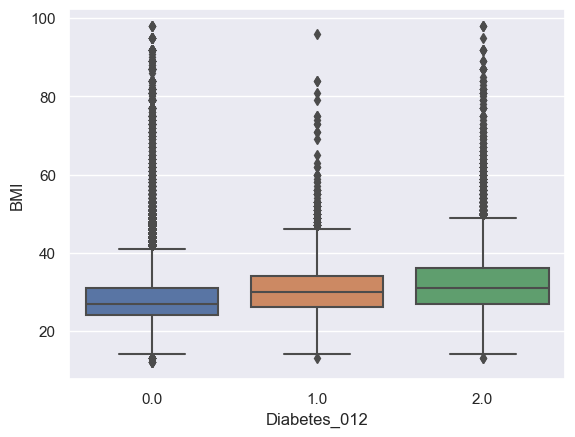

In [207]:
sns.boxplot(diabetes_df, y='BMI',x='Diabetes_012')

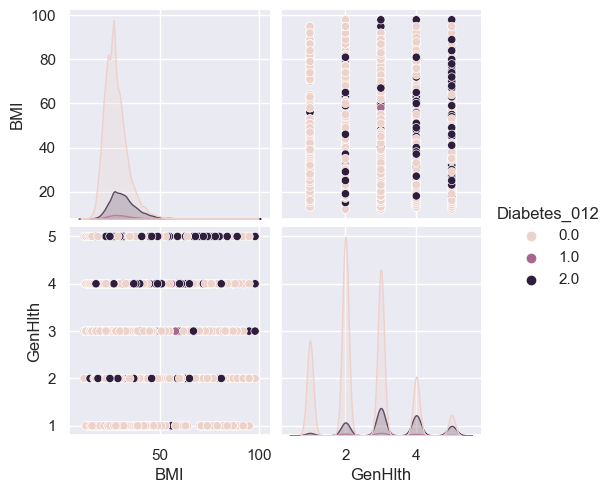

In [16]:
sns.pairplot(diabetes_df, vars=["BMI","GenHlth"], hue="Diabetes_012")

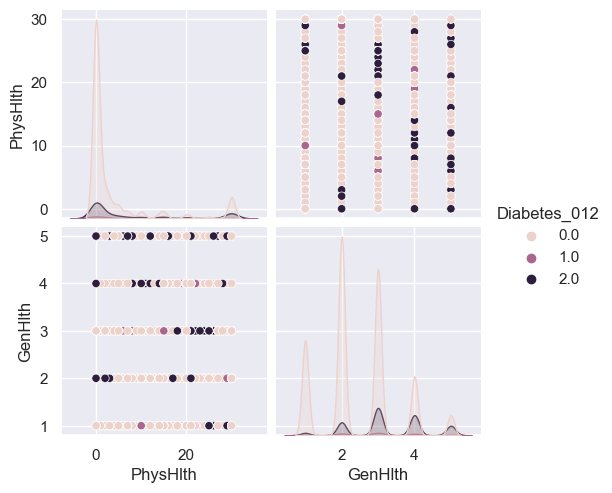

In [17]:
sns.pairplot(diabetes_df, vars=["PhysHlth","GenHlth"], hue="Diabetes_012")